# Ananta Faadillah Sophan
# Milestone 1 Phase 2
# Batch HCK-002

# Problem Statement

Membuat Model Deep Learning untuk Mengklasifikasikan Customer pada perusahaan Telco yang bergerak di bidang telekomunikasi sebagai Customer Churn atau tidak
- Churn : Keadaan dimana seseorang yang awalnya Customer Telco namun tidak lagi menjadi Customer di Telco



Maka dari itu, akan dianalisa faktor-faktor apa saja yang mempengaruhi suatu Customer Churn atau tidak dan kemudian melakukan prediksi klasifikasi pada setiap Customer yang ada pada dataset

Data Description: 


|      `COLUMN`      | DESCRIPTION                                                                                                       |
| :----------------: | :---------------------------------------------------------------------------------------------------------------- |
|    `customerID`    | ID Customer                                                                                                       |
|      `gender`      | Whether the customer is a male or a female                                                                        |
|  `SeniorCitizen`   | Whether the customer is a senior citizen or not **(1, 0)**                                                            |
|     `Partner`      | Whether the customer has a partner or not **(Yes, No)**                                                               |
|    `Dependents`    | Whether the customer has dependents or not **(Yes, No)**                                                              |
|      `tenure`      | Number of months the customer has stayed with the company                                                         |
|   `PhoneService`   | Whether the customer has a phone service or not **(Yes, No)**                                                         |
|  `MultipleLines`   | Whether the customer has multiple lines or not **(Yes, No, No phone service)**                                        |
| `InternetService`  | Customer’s internet service provider **(DSL, Fiber optic, No)**                                                       |
|  `OnlineSecurity`  | Whether the customer has online security or not **(Yes, No, No internet service)**                                    |
|   `OnlineBackup`   | Whether the customer has online backup or not **(Yes, No, No internet service)**                                      |
| `DeviceProtection` | Whether the customer has device protection or not **(Yes, No, No internet service)**                                  |
|   `TechSupport`    | Whether the customer has tech support or not **(Yes, No, No internet service)**                                       |
|   `StreamingTV`    | Whether the customer has streaming TV or not **(Yes, No, No internet service)**                                       |
| `StreamingMovies`  | Whether the customer has streaming movies or not **(Yes, No, No internet service)**                                   |
|     `Contract`     | The contract term of the customer **(Month-to-month, One year, Two year)**                                            |
| `PaperlessBilling` | Whether the customer has paperless billing or not **(Yes, No)**                                                       |
|  `PaymentMethod`   | The customer’s payment method **(Electronic check, Mailed check, Bank transfer (automatic), Credit card(automatic))** |
|  `MonthlyCharges`  | The amount charged to the customer monthly                                                                        |
|   `TotalCharges`   | The total amount charged to the customer                                                                          |
|      `Churn`       | Whether the customer churned or not **(Yes or No)**                                                                   |

## Import Libraries

Import Library yang dibutuhkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTENC
np.random.seed(50)
tf.random.set_seed(50)

import pickle

## Data Loading

Import Dataset yang dibutuhkan dan melakukan sedikit Overview data

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df[df.duplicated()].shape

(0, 21)

Setelah dilakukan overview data, dapat dilihat bahwa dataset tidak memiliki missing values ataupun data duplikat, Namun akan dilakukan analisa lebih lanjut untuk memvalidasi apakah data sudah bersih pada Data Cleaning Section

## Data Cleaning

Membuat Dataframe baru dengan Copy Dataframe agar tidak mengganggu dataframe yang asli

In [ ]:
df_clean = df.copy()

Mengecek Unique Value pada setiap kolom/feature

In [ ]:
for x in df:
    print(f'Value In {x}: ', df[x].unique(), '\n', 'Total Value:', len(df[x].unique()))
    print('-'*100)

Value In customerID:  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] 
 Total Value: 7043
----------------------------------------------------------------------------------------------------
Value In gender:  ['Female' 'Male'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In SeniorCitizen:  [0 1] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In Partner:  ['Yes' 'No'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In Dependents:  ['No' 'Yes'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In tenure:  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 3

Walaupun sudah dilakukan pengecekan Missing Values, Tetap akan dilakukan validasi apakah ada Entry Data yang Mistyping yang bisa diasumsikan juga sebagai Missing Values

In [ ]:
missing_values = {}

for x in list(df_clean.columns):
    missing_values[x] = 0
    for y in df_clean[x]:
        if y in ['N/A', '--', '-', 'Null', '?', ' ','NaN']: # These are the specific NaN values we will be sweeping for.
            missing_values[x] = missing_values[x] + 1

missing_values

{'customerID': 0,
 'gender': 0,
 'SeniorCitizen': 0,
 'Partner': 0,
 'Dependents': 0,
 'tenure': 0,
 'PhoneService': 0,
 'MultipleLines': 0,
 'InternetService': 0,
 'OnlineSecurity': 0,
 'OnlineBackup': 0,
 'DeviceProtection': 0,
 'TechSupport': 0,
 'StreamingTV': 0,
 'StreamingMovies': 0,
 'Contract': 0,
 'PaperlessBilling': 0,
 'PaymentMethod': 0,
 'MonthlyCharges': 0,
 'TotalCharges': 11,
 'Churn': 0}

Dapat dilihat bahwa ada total 11 Entry Data pada kolom/feature 'TotalCharges' yang merupakan Mistyping atau bisa diasumsikan sebagai Missing Values

### Simple Imputer

Sebelum dilakukan pengisian Missing Values, saya mengubah Data Type pada 'TotalCharges' menjadi float. 'TotalCharges' pada awalnya mempunyai Data Type object. Alasan dilakukan perubahan adalah karena 'TotalCharges' sebenernya merupakan kolom/feature numerikal

In [ ]:
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'],errors='coerce')

In [ ]:
df_clean.isnull().sum().sum()

11

Mengecek Nilai skew untuk mengetahui persebaran datanya. Tujuan melihat nilai skew adalah untuk menentukan Strategy pada Simple Imputer

In [ ]:
df_clean['TotalCharges'].skew()

0.961642499724251

Melakukan pengisisian Missing Values dengan SimpleImputer. Berdasarkan nilai skewnya, pengisian Missing Values akan diisi dengan nilai median

In [ ]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)
imputer = imputer.fit(df_clean[['TotalCharges']])
df_clean['TotalCharges'] = imputer.transform(df_clean[['TotalCharges']])

In [ ]:
df_clean.isnull().sum().sum()

0

### Grouping

Melakukan Grouping Values pada Feature, berdasarkan asumsi pribadi, beberapa Feature memiliki Value yang mempunyai arti yang sama, sehingga Value yang sama akan digabung

#### Grouping: OnlineSecurity

In [ ]:
manipulated = []

for i in df_clean['OnlineSecurity']:
    if i=='No' or i=='Yes':
        manipulated.append(i)
    else:
        manipulated.append('No')

df_clean['OnlineSecurity'] = manipulated.copy()

#### Grouping: OnlineBackup

In [ ]:
manipulated2 = []

for i in df_clean['OnlineBackup']:
    if i=='No' or i=='Yes':
        manipulated2.append(i)
    else:
        manipulated2.append('No')

df_clean['OnlineBackup'] = manipulated2.copy()

#### Grouping: DeviceProtection

In [ ]:
manipulated3 = []

for i in df_clean['DeviceProtection']:
    if i=='No' or i=='Yes':
        manipulated3.append(i)
    else:
        manipulated3.append('No')

df_clean['DeviceProtection'] = manipulated3.copy()

#### Grouping: TechSupport

In [ ]:
manipulated4 = []

for i in df_clean['TechSupport']:
    if i=='No' or i=='Yes':
        manipulated4.append(i)
    else:
        manipulated4.append('No')

df_clean['TechSupport'] = manipulated4.copy()

#### Grouping: StreamingTC

In [ ]:
manipulated5 = []

for i in df_clean['StreamingTV']:
    if i=='No' or i=='Yes':
        manipulated5.append(i)
    else:
        manipulated5.append('No')

df_clean['StreamingTV'] = manipulated5.copy()

#### Grouping: StreamingMovies

In [ ]:
manipulated6 = []

for i in df_clean['StreamingMovies']:
    if i=='No' or i=='Yes':
        manipulated6.append(i)
    else:
        manipulated6.append('No')

df_clean['StreamingMovies'] = manipulated6.copy()

#### Grouping: MultipleLines

In [ ]:
manipulated7 = []

for i in df_clean['MultipleLines']:
    if i=='No' or i=='Yes':
        manipulated7.append(i)
    else:
        manipulated7.append('No')

df_clean['MultipleLines'] = manipulated7.copy()

#### Grouping Overview

In [ ]:
for x in df_clean[[ 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies','MultipleLines']]:
   print(f'Value In {x}: ', df_clean[x].unique(), '\n', 'Total Value:', len(df_clean[x].unique()))
   print('-'*100)
  

Value In OnlineSecurity:  ['No' 'Yes'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In OnlineBackup:  ['Yes' 'No'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In DeviceProtection:  ['No' 'Yes'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In TechSupport:  ['No' 'Yes'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In StreamingTV:  ['No' 'Yes'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In StreamingMovies:  ['No' 'Yes'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In MultipleLines:  ['No' 'Yes'] 
 Total Value: 2
--------

### Drop customerID

Menghapu kolom customerID dikarenakan kolom tersebut tidak mempunyai korelasi apa-apa terhadap target. Pada dasarnya ID merupakan hal yang sama dengan Index

In [ ]:
df_clean.drop(['customerID'],axis =1, inplace = True)

## Exploratory Data Analysis

### EDA For Analysis Purpose

In [ ]:
df_ed =df_clean.copy()

In [ ]:
# Grouping data
df_charges = df_ed.groupby('PaymentMethod').mean()['MonthlyCharges'].reset_index()
df_charges = df_charges.sort_values(by='MonthlyCharges', ascending=True).reset_index()


Text(0, 0.5, 'Payment Type')

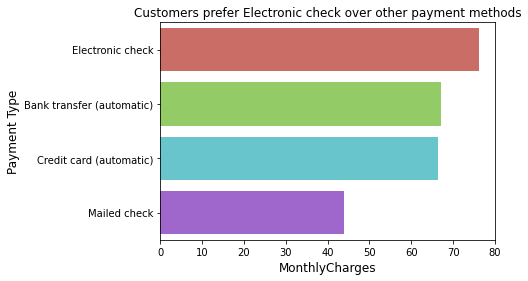

In [ ]:
df1 = df_charges.sort_values(by='MonthlyCharges', ascending=False)
ax = sns.barplot(x='MonthlyCharges', y='PaymentMethod', data=df1, palette="hls")
ax.set_title('Customers prefer Electronic check over other payment methods')

plt.xlabel('MonthlyCharges', fontsize = 12)
plt.ylabel('Payment Type', fontsize = 12)

Text(0, 0.5, 'Total Customer')

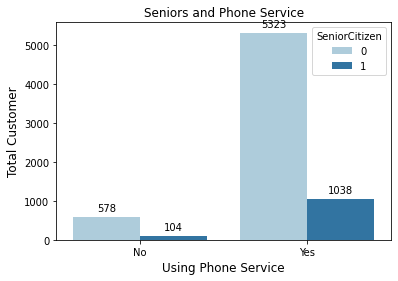

In [ ]:
seniorplot = sns.countplot(x='PhoneService', data=df, hue='SeniorCitizen', palette="Paired")
seniorplot.set_title('Seniors and Phone Service')

for p in seniorplot.patches:
    seniorplot.annotate(int(p.get_height()), 
                   (p.get_x() + p.get_width() / 2, p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel('Using Phone Service', fontsize = 12)
plt.ylabel('Total Customer', fontsize = 12)

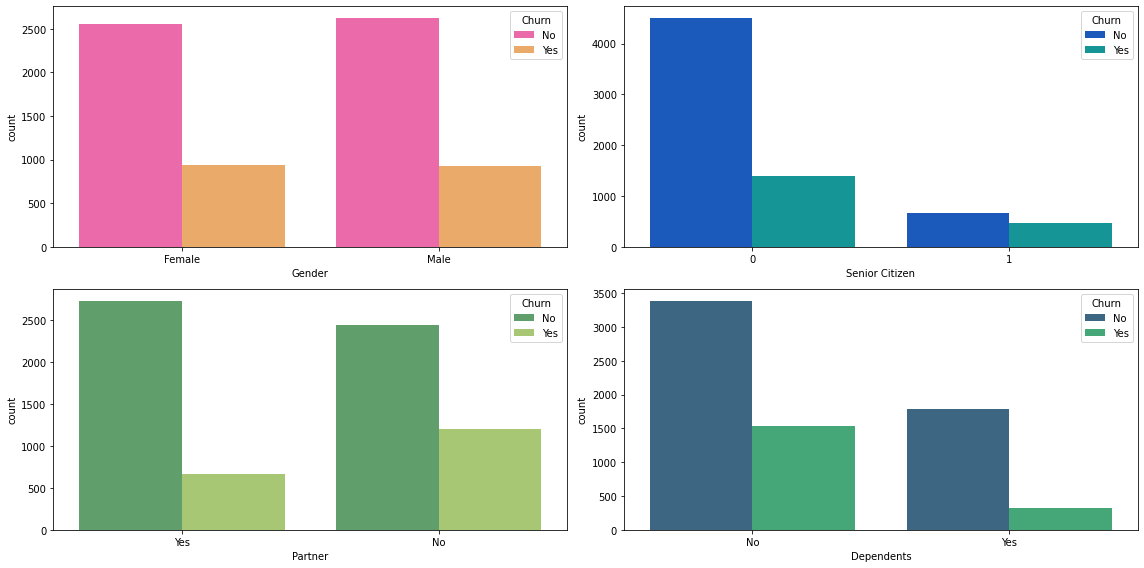

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (16, 8))
ax1 = sns.countplot(x ='gender', data= df_clean, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='SeniorCitizen', data= df_clean, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(x ='Partner', data= df_clean, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(x ='Dependents', data= df_clean, hue= 'Churn', ax= ax[1, 1], palette= 'viridis')
ax4.set(xlabel = 'Dependents')

plt.tight_layout()
plt.show()

### Target Definition

No     5174
Yes    1869
Name: Churn, dtype: int64
--------------------------------------------------------------------------------


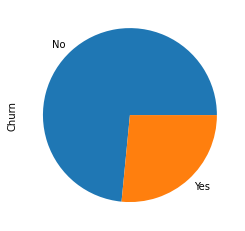

In [ ]:
print(df_clean['Churn'].value_counts())
print('-'*80)
df_clean['Churn'].value_counts().plot(kind='pie')


| Degree of imbalance | Proportion of Minority Class |
| --- | --- |
| Mild | 20-40% of the data set |
| Moderate | 1-20% of the data set |
| Extreme | < 1% of the data set |



In [ ]:
df_clean['Churn'] = df_clean['Churn'].replace({'No': 0,'Yes': 1})

Dapat dilihat bahwa pada kolom 'Churn' yang merupakan target, jumlah data antara '0' dan '1' imbalance , namun selisih jumlah entry data dari kedua value tersebut tidak jauh dengan perbandingan 63,5% target '0' dan 26,5% data target '1' sehinnga dapat dikategorikan sebagai mild data imbalance.

definisi dari kelas target:

- 0 = Customer yang tidak Churn
- 1 = Customer yang Churn

### Splitting

#### Train, Validation, Test Set

Memisahkan dataframe menjadi Train Set, Validation Set, Test Set

In [ ]:
Feature = df_clean.drop('Churn', axis=1)
Target = df_clean['Churn']

In [ ]:
X_train_full, X_test,  y_train_full, y_test = train_test_split(Feature,
                                                               Target,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= Target
                                                               )

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

In [ ]:
df_eda = pd.concat([X_train, y_train], axis=1)
df_val = pd.concat([X_val, y_val], axis=1)
testing = pd.concat([X_test, y_test], axis=1)

#### Categorical and Numerical Columns

Memisahkan kolom/feature berdasarkan kategorikan dan numerikal

In [ ]:
numcol = df_clean.select_dtypes(exclude=['object']).columns.tolist() 
catcol = df_clean.select_dtypes(include=['object']).columns.tolist() + ['Churn']

In [ ]:
df_num= df_eda[numcol]
df_cat= df_eda[catcol]

### Numerical Columns

#### Handling Outlier

plotting persebaran data dan melihat upper boundaries, lower boundaries, dan nilai skew pada kolom numerikal

In [ ]:
def plot_dist(df_num, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))

# histogram
    sns.histplot(df_num[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df_num[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df_num[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()

# boxplot
    if df_num[col].skew() >= 1 or df_num[col].skew() <= -1 :
        sns.boxplot(y=df_num[col], ax =  axes[1], whis=3)
        axes[1].set_title(f"Boxplot '{col}'")
    
        plt.show()
    else:
        sns.boxplot(y=df_num[col], ax =  axes[1], whis=1.5)
        axes[1].set_title(f"Boxplot '{col}'")
    
        plt.show()
        
# skewness
    print(df_num[col].name + ' Skewness: ' + str(df_num[col].skew()))
    if -0.5 <= df_num[col].skew() <= 0.5:
        print("Columns '{}' normal distribution".format(col))
    elif df_num[col].skew() > 0.5:
        print("Columns '{}' right skewed".format(col))
    elif df_num[col].skew() < -0.5:
        print("Columns '{}' left skewed".format(col))

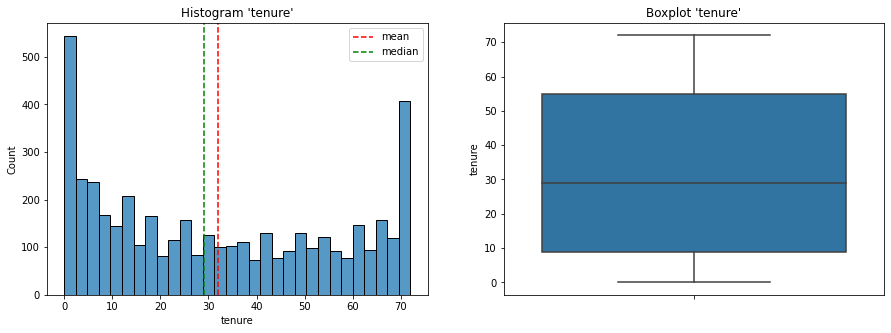

tenure Skewness: 0.2566456254306895
Columns 'tenure' normal distribution


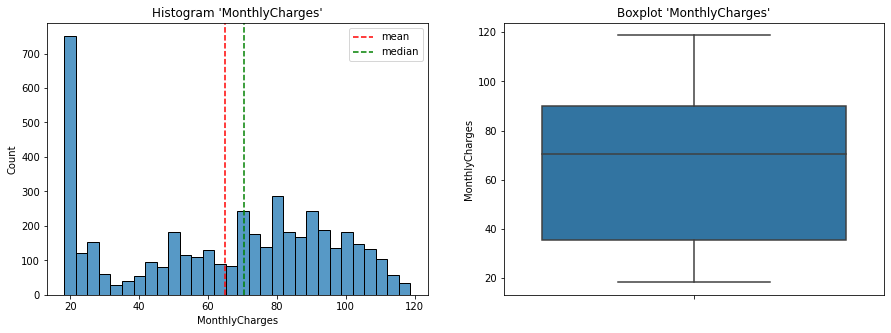

MonthlyCharges Skewness: -0.2225548539607036
Columns 'MonthlyCharges' normal distribution


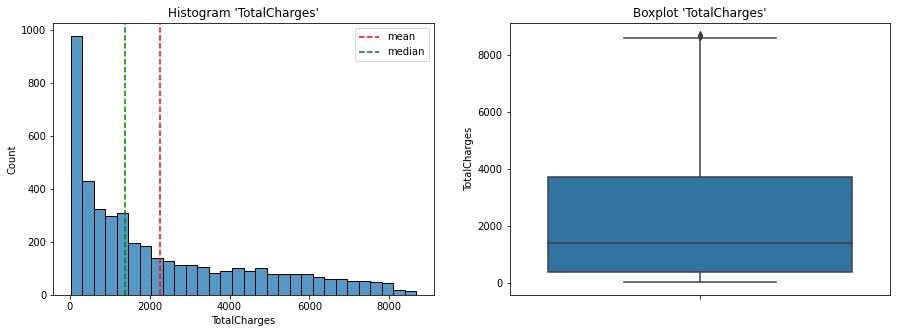

TotalCharges Skewness: 0.9910192655693615
Columns 'TotalCharges' right skewed


In [ ]:
for i in df_num[['tenure','MonthlyCharges','TotalCharges']]:
  plot_dist(df_num,i)


In [ ]:
for k in df_num[['tenure','MonthlyCharges','TotalCharges']]:

  Q3 = df_num[k].quantile(.75)
  Q1 = df_num[k].quantile(.25)

  IQR = Q3 - Q1

  upper = Q3 + (1.5 * IQR)
  lower = Q1 - (1.5 * IQR)

  outlier = df_num[(df_num[k] > upper) | (df_num[k] < lower)]
  print(k)
  print('count of outlier: ', outlier.shape[0])
  print('percent k of outlier: ', outlier.shape[0]/df_num.shape[0] * 100, '%')
  print('='*70)

tenure
count of outlier:  0
percent k of outlier:  0.0 %
MonthlyCharges
count of outlier:  0
percent k of outlier:  0.0 %
TotalCharges
count of outlier:  3
percent k of outlier:  0.06656312402928778 %


Setelah dilihat, feature numerikal pada dataset kali ini semuanya tidak memiliki data Outlier walaupun ada satu kolom yaitu 'TotalCharges' yang persebaran datanya merupakan right skew.

#### Feature Selection For Numerical Feature

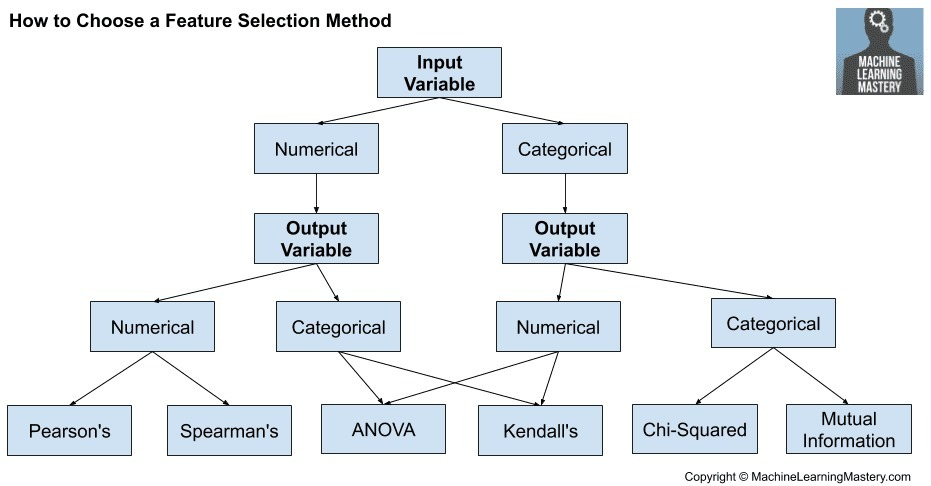

Berdasarkan Konsep diatas, saya akan melakukan Feature Selection dengan metode Anova

##### Anova Test

In [ ]:
Xfsn= df_num.drop('Churn',axis=1)
yfsn = df_num['Churn']

In [ ]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(Xfsn, yfsn)
fit.scores_

array([104.56777188, 659.04500153, 177.65453436, 203.75597456])

In [ ]:
np.round_(fit.scores_)

array([105., 659., 178., 204.])

In [ ]:
result = pd.Series(fit.scores_)
result.index = Xfsn.columns
result.sort_values(ascending=False)

tenure            659.045002
TotalCharges      203.755975
MonthlyCharges    177.654534
SeniorCitizen     104.567772
dtype: float64

In [ ]:
# plt.figure(figsize=(30, 15))
# sns.heatmap(df_num.corr(), annot= True, vmin=0, vmax=1)
# plt.show()

Setelah dilakukan Feature Selection dengan Anova, saya akan mengambil feature yang nilainya diatas 150

In [ ]:
df_num_final = df_num[[
  'tenure','MonthlyCharges','TotalCharges','Churn'
]]

### Categorical Columns

In [ ]:
df_cat.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
4015,Female,No,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Mailed check,0
743,Female,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No,Two year,Yes,Mailed check,0
4687,Male,Yes,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),1
2676,Female,No,No,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,0
1168,Male,Yes,Yes,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,0


Melihat Unique Value pada kolom/feature kategorikal untuk mengatahui Encoder apa yang cocok pada setiap kolom/feature kategorikal yang ada

In [ ]:
for x in df_cat:
    print(f'Value In {x}: ', df_cat[x].unique(), '\n', 'Total Value:', len(df_cat[x].unique()))
    print('-'*100)

Value In gender:  ['Female' 'Male'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In Partner:  ['No' 'Yes'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In Dependents:  ['No' 'Yes'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In PhoneService:  ['Yes' 'No'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In MultipleLines:  ['Yes' 'No'] 
 Total Value: 2
----------------------------------------------------------------------------------------------------
Value In InternetService:  ['DSL' 'No' 'Fiber optic'] 
 Total Value: 3
----------------------------------------------------------------------------------------------------
Value In OnlineSecurity:  ['Yes' 'No'] 
 Total Value: 2
----

#### Encoding

##### OrdinalEncoder

OrdinalEncoder digunakan pada feature yang merupakan Binary Feature ataupun Feature yang memiliki Urutan/ranking

In [ ]:
gen = ['Female', 'Male']
partner = ['No', 'Yes']
dependents = ['No', 'Yes']
Phoneserv = ['No', 'Yes']
Multiplelines = ['No', 'Yes']
OlSec= ['No', 'Yes']
OlBackup= ['No', 'Yes']
DevProt= ['No', 'Yes']
TechSupport= ['No', 'Yes']
StreamMov= ['No', 'Yes']
StreamTV= ['No', 'Yes']
papbill = ['No', 'Yes']


ord_enc = OrdinalEncoder(categories=[gen,partner,dependents,Phoneserv,Multiplelines,OlSec,
                                     OlBackup,DevProt,TechSupport,StreamMov,StreamTV,papbill])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_cat[['gender','Partner','Dependents','PhoneService','MultipleLines',
'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']]))

cat_ord.columns = ['gender','Partner','Dependents','PhoneService','MultipleLines',
'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']



In [ ]:
review = pd.concat([df_cat[['gender','Partner','Dependents','PhoneService','MultipleLines',
'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']].reset_index(drop=True), cat_ord.reset_index(drop=True)], axis=1)
review

,gender,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,Female,No,No,Yes,Yes,Yes,No,No,No,No,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Female,Yes,Yes,Yes,Yes,No,No,No,No,No,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Male,Yes,No,Yes,No,No,No,Yes,No,Yes,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
3,Female,No,No,Yes,No,No,No,No,No,No,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Male,Yes,Yes,Yes,No,No,No,No,No,No,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,Female,Yes,Yes,No,No,Yes,Yes,No,No,No,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4503,Female,No,No,Yes,No,No,No,No,No,No,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4504,Female,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
4505,Male,No,No,Yes,No,No,No,No,No,No,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### OneHotEncoder

OrdinalEncoder digunakan pada feature yang bukan merupakan Binary Feature ataupun Feature yang memiliki Urutan/ranking

In [ ]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_cat[['InternetService','Contract','PaymentMethod']]))
cat_ohe.columns = ohe_enc.get_feature_names(['InternetService','Contract','PaymentMethod'])

review = pd.concat([df_cat[['InternetService','Contract','PaymentMethod']].reset_index(drop=True), cat_ohe], axis=1)
review

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,InternetService,Contract,PaymentMethod,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,DSL,One year,Mailed check,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,No,Two year,Mailed check,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Fiber optic,Month-to-month,Credit card (automatic),0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,No,One year,Mailed check,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,No,One year,Mailed check,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,DSL,Month-to-month,Electronic check,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4503,DSL,Month-to-month,Mailed check,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4504,DSL,Two year,Bank transfer (automatic),1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4505,No,One year,Bank transfer (automatic),0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
cat_ohe.columns.tolist()

['InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check']

menggabungkan feature-feature yang sudah diencode sebelumnya menjadi Dataframe yang baru

In [ ]:
df_final = pd.concat([ cat_ohe, cat_ord,df_num_final.reset_index(drop=True)], axis=1)


In [ ]:
df_final

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36,54.45,1893.50,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,61,24.10,1551.60,0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,22,94.70,1914.90,1
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,29,20.35,617.35,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,19.65,19.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4502,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,32,35.15,1051.05,0
4503,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8,44.45,369.30,0
4504,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,72,86.60,6350.50,0
4505,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,45,18.85,867.30,0


### Feature Selection For Categorical Columns

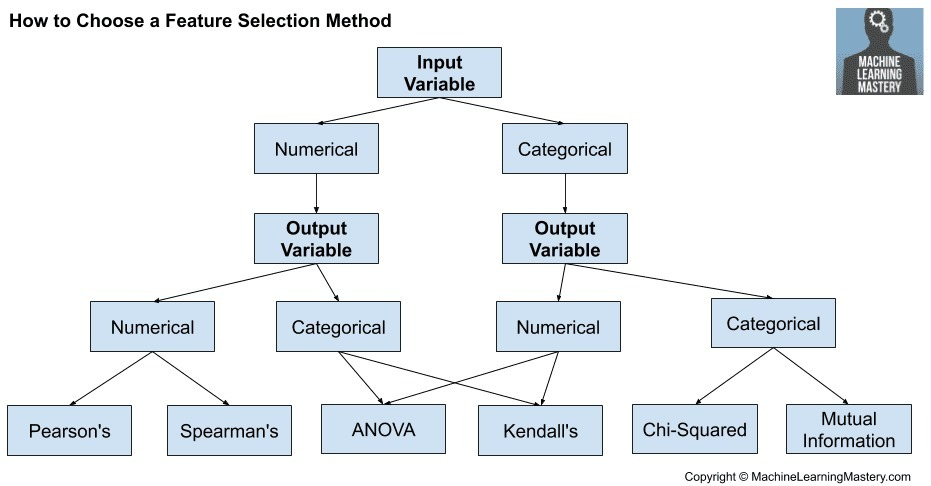

Berdasarkan konsep diatas, saya akan melakukan Feature Selection dengan metode Chi Square

##### Chi Square 

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
df_cat_fs = pd.concat([ cat_ohe.reset_index(drop=True), cat_ord.reset_index(drop=True), df_cat['Churn'].reset_index(drop=True)], axis=1)


In [ ]:
df_cat_fs.isnull().sum()

InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
gender                                     0
Partner                                    0
Dependents                                 0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
Churn     

In [ ]:
Xfs = df_cat_fs.drop('Churn',axis=1)
yfs = df_cat_fs['Churn']

In [ ]:
mutual_info = mutual_info_classif(Xfs, yfs)
mutual_info

array([0.01058188, 0.0440011 , 0.03992561, 0.1021461 , 0.01030598,
       0.05261267, 0.00384759, 0.        , 0.04281811, 0.        ,
       0.00150821, 0.01541312, 0.02144454, 0.        , 0.        ,
       0.02282737, 0.00343028, 0.00520096, 0.01456512, 0.00794777,
       0.00050614, 0.02524516])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = Xfs.columns
mutual_info.sort_values(ascending=False)

Contract_Month-to-month                    0.102146
Contract_Two year                          0.052613
InternetService_Fiber optic                0.044001
PaymentMethod_Electronic check             0.042818
InternetService_No                         0.039926
PaperlessBilling                           0.025245
OnlineSecurity                             0.022827
Dependents                                 0.021445
Partner                                    0.015413
TechSupport                                0.014565
InternetService_DSL                        0.010582
Contract_One year                          0.010306
StreamingTV                                0.007948
DeviceProtection                           0.005201
PaymentMethod_Bank transfer (automatic)    0.003848
OnlineBackup                               0.003430
gender                                     0.001508
StreamingMovies                            0.000506
PaymentMethod_Mailed check                 0.000000
PaymentMetho

Setelah melakukan Chi-Square, dapat dilihat bahwa 5 nilai teratas merupakan Feature yang merupakan Encode dari Feature Contract dan Internet Service. Maka dari itu, dapat diasumsikan bahwa Feature 'InternetService' dan 'Contract' cukup berpengaruh terhadap target

In [ ]:

# fig,ax = plt.subplots(figsize=[30,15])

# corr = df_final.corr()

# ax = sns.heatmap(corr,annot=True)
# plt.show()

In [ ]:
df_final.columns.tolist()

['InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Mengambil Feature yang dibutuhkan dari dataframe akhir.

In [ ]:
df_final = df_final[['InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']]

### Scaling (StandardScaler)

Melakukan scaling dengan StandardScaler karena distribusi datanya tidak normal pada kolom. Scaling dilakukan dengan tujuan agar model tidak bingung jika membaca nilai dari sebuah value karena sudah dibuat menjadi rentang skala yang lebih kecil

In [ ]:
scaling = ['tenure','MonthlyCharges','TotalCharges']

In [ ]:
scaler = StandardScaler()

df_final[scaling] = scaler.fit_transform(df_final[scaling])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
df_final.head()

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,0.0,1.0,0.0,0.160270,-0.345078,-0.164504,0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.183871,-1.353478,-0.316063,0
2,0.0,1.0,0.0,1.0,0.0,0.0,-0.412947,0.992256,-0.155018,1
3,0.0,0.0,1.0,0.0,1.0,0.0,-0.126339,-1.478075,-0.730200,0
4,0.0,0.0,1.0,0.0,1.0,0.0,-1.272773,-1.501333,-0.995150,0


## Data Preprocessing

### Pipeline

Pada Bagian Preprocessing, saya akan menggunakan Pipeline pada data Train, data Validation dan data Test. Pembuatan Pipeline dibagi menjadi Pipeline numerikal dan Pipeline kategorikal dan nantinya akan digabung menjadi 1 Pipeline

#### Numerical Pipeline

In [ ]:
num_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])

In [ ]:
num_tr = num_pipeline.fit_transform(X_train[['tenure',
 'MonthlyCharges',
 'TotalCharges',]])
num_tr

array([[ 0.16026962, -0.34507842, -0.16450408],
       [ 1.18387121, -1.35347843, -0.31606252],
       [-0.41294727,  0.99225602, -0.15501783],
       ...,
       [ 1.63425591,  0.72312785,  1.81120796],
       [ 0.52876619, -1.52791336, -0.61940103],
       [ 0.03743743,  0.50716079,  0.15013815]])

#### Categorical Pipeline

In [ ]:
cat_pipeline = Pipeline([
    ('ohe_enc',  OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [ ]:
cat_tr = cat_pipeline.fit_transform(X_train[['InternetService','Contract']])
cat_tr

array([[1., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0.]])

### Full Pipeline

Menggabungkan Pipeline numerikal dan Kategorikal

In [ ]:
full_pipeline = ColumnTransformer([
        ("scaling", num_pipeline, ['tenure',
 'MonthlyCharges',
 'TotalCharges',]),
        ("ohe_enc", cat_pipeline, ['InternetService','Contract']),
    ])

Melakukan Overview terhadap data yang sudah diterapkan Pipeline

In [ ]:
numcolpipe= ['tenure',
 'MonthlyCharges',
 'TotalCharges']

catcolpipe=['InternetService_DSL',
'InternetService_Fiber optic',
'InternetService_No',
'Contract_Month-to-month',
'Contract_One year',
'Contract_Two year']


In [ ]:
X_train_pipe = pd.DataFrame(full_pipeline.fit_transform(X_train),columns= numcolpipe+catcolpipe)

In [ ]:
X_train_pipe 

,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0.160270,-0.345078,-0.164504,1.0,0.0,0.0,0.0,1.0,0.0
1,1.183871,-1.353478,-0.316063,0.0,0.0,1.0,0.0,0.0,1.0
2,-0.412947,0.992256,-0.155018,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.126339,-1.478075,-0.730200,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.272773,-1.501333,-0.995150,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
4502,-0.003507,-0.986334,-0.537948,1.0,0.0,0.0,1.0,0.0,0.0
4503,-0.986164,-0.677335,-0.840156,1.0,0.0,0.0,1.0,0.0,0.0
4504,1.634256,0.723128,1.811208,1.0,0.0,0.0,0.0,0.0,1.0
4505,0.528766,-1.527913,-0.619401,0.0,0.0,1.0,0.0,1.0,0.0


Pipeline yang sudah dibuat merupakan Pipeline Data Imbalanced, maka dari itu saya akan memasukan SMOTE kedalam Pipeline menyeimbangkan data target dengan metode Over Sampling.

In [ ]:
final_pipe = imbpipe([
            ('preprocess', full_pipeline),
            ('over_sampl', SMOTENC([3,4,5,6,7,8], sampling_strategy=1.0, random_state=0))
])

In [ ]:
final_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaling',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('ohe_enc',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['InternetService',
                                                   'Contract'])])),
                ('over_sampl',
                 SMOTENC(categorical_features=[3, 4, 5, 6, 7, 8],
                

Setelah Pipeline sudah jadi, maka Pipeline akan diterapkan pada data train,validation, dan test.

In [ ]:
X_resampled, y_resampled = final_pipe.fit_resample(X_train, y_train)

resampled = pd.concat([pd.DataFrame(X_resampled, columns=numcolpipe+catcolpipe), pd.DataFrame(y_resampled)], axis=1)
resampled

,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Churn
0,0.160270,-0.345078,-0.164504,1.0,0.0,0.0,0.0,1.0,0.0,0
1,1.183871,-1.353478,-0.316063,0.0,0.0,1.0,0.0,0.0,1.0,0
2,-0.412947,0.992256,-0.155018,0.0,1.0,0.0,1.0,0.0,0.0,1
3,-0.126339,-1.478075,-0.730200,0.0,0.0,1.0,0.0,1.0,0.0,0
4,-1.272773,-1.501333,-0.995150,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6625,-0.571393,-0.508695,-0.611960,1.0,0.0,0.0,1.0,0.0,0.0,1
6626,-1.272773,0.190616,-0.972577,0.0,1.0,0.0,1.0,0.0,0.0,1
6627,-0.292527,0.211856,-0.220933,0.0,1.0,0.0,1.0,0.0,0.0,1
6628,0.909638,1.335218,1.511114,0.0,1.0,0.0,0.0,1.0,0.0,1


In [ ]:
resampled.Churn.value_counts()

0    3315
1    3315
Name: Churn, dtype: int64

In [ ]:
test_tr = full_pipeline.transform(X_test)
test_tr

array([[-1.27277261, -1.48305867, -0.994906  , ...,  1.        ,
         0.        ,  0.        ],
       [-1.02710823, -0.53280363, -0.84879995, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.10198308,  0.36927414,  1.00968592, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.36498994, -0.8135608 , -0.26009804, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.73348651, -1.47142967, -0.53058929, ...,  0.        ,
         0.        ,  1.        ],
       [-0.20822695,  1.02215915,  0.14656972, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
val_tr = full_pipeline.transform(X_val)
val_tr

array([[ 0.81537464, -0.16565964,  0.37175745, ...,  0.        ,
         0.        ,  1.        ],
       [-1.27277261,  0.32109687, -0.97083574, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.47047966,  0.51546722,  1.47378099, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.3067034 ,  0.31611301,  1.10596698, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.51142372, -1.49302638, -0.40245836, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.405934  ,  1.32617431,  0.91265129, ...,  1.        ,
         0.        ,  0.        ]])

## Modeling

### Tensorflow Pipeline

Sebelum melakukan modeling, saya terlebih dahulu akan membuat Pipeline untuk TensorFlow

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_resampled, y_resampled))
train_dataset = train_dataset.shuffle(buffer_size=4000).batch(64)

val_dataset = tf.data.Dataset.from_tensor_slices((val_tr, y_val))
val_dataset = val_dataset.batch(64)

test_dataset = tf.data.Dataset.from_tensor_slices((test_tr, y_test))
test_dataset = test_dataset.batch(64) 

Pada pembuatan Pipeline Tensorflow, saya menginisiasi Batch pada setiap data set. Batch merupakan Pengelompokan data tiap Training atau Epochs. Nilai Batch biasanya merupakan kelipatan dari RAM komputer. DIsini saya mencoba inisiasi Batch 64. Pada Train Set saya melakukan shuffle dengan buffer_size = 4000. inisiai buffer_size biasanya berdasarkan jumlah entry data, pada kasus kali ini jumlah entry data adalah sekitar 6000an. Menurut asumsi pribadi, jika saya inisiasi buffer_size = 6000, nilai buffer_size nya terlalu besar, sehingga saya menginisiasi buffer_size =4000. buffer_size merupakan tempat sementara penampungan data yang sedang di shuffle.

### Sequential

#### Model Definition

Menentukan Jumlah Neuron

In [ ]:
# defining neuron ammount
alp = 15
inp = X_resampled.shape[1]
out = 1
hid = int(len(X_resampled)/(alp*(inp+out)))
print(f'Jumlah Neuron pada Hidden Layer: {hid}')

Jumlah Neuron pada Hidden Layer: 44


Membuat Arstiekur Model ANN Sequential

In [ ]:
# Sequential Model Architecture
model_seq = tf.keras.models.Sequential()

# Input layer
model_seq.add(tf.keras.layers.Dense(inp, activation='relu', kernel_initializer='HeNormal', input_shape=(inp,))) 
model_seq.add(tf.keras.layers.BatchNormalization())

# Hidden layer
model_seq.add(tf.keras.layers.Dense(hid, activation='relu'))
model_seq.add(tf.keras.layers.BatchNormalization())


# Output layer  
model_seq.add(tf.keras.layers.Dense(out, activation='sigmoid'))

# Set the optimizer
opt = tf.keras.optimizers.Adam()

# Compiling the model
model_seq.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])



In [ ]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 90        
                                                                 
 batch_normalization (BatchN  (None, 9)                36        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 44)                440       
                                                                 
 batch_normalization_1 (Batc  (None, 44)               176       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 45        
                                                                 
Total params: 787
Trainable params: 681
Non-trainable pa

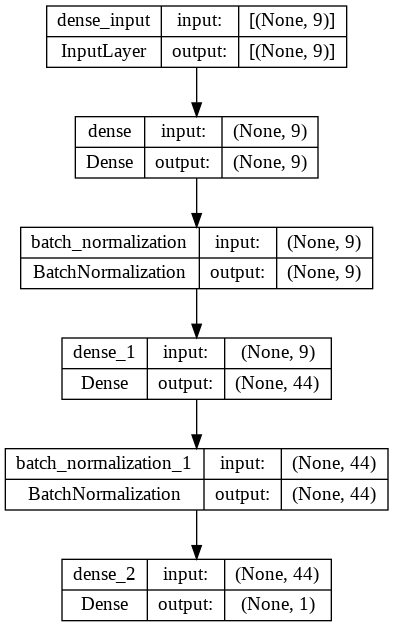

In [ ]:
# Model plotting
tf.keras.utils.plot_model(model_seq, show_shapes=True, show_layer_names=True)

#### Model Training

In [ ]:
history_seq=model_seq.fit(train_dataset, validation_data=(val_dataset), epochs = 50)

Epoch 1/50
104/104 [==============================] - 2s 5ms/step - loss: 0.5475 - accuracy: 0.7237 - val_loss: 0.6673 - val_accuracy: 0.5972
Epoch 2/50
104/104 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7517 - val_loss: 0.5816 - val_accuracy: 0.6868
Epoch 3/50
104/104 [==============================] - 0s 3ms/step - loss: 0.5135 - accuracy: 0.7522 - val_loss: 0.5182 - val_accuracy: 0.7152
Epoch 4/50
104/104 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7526 - val_loss: 0.5103 - val_accuracy: 0.7196
Epoch 5/50
104/104 [==============================] - 0s 3ms/step - loss: 0.5091 - accuracy: 0.7549 - val_loss: 0.5168 - val_accuracy: 0.7365
Epoch 6/50
104/104 [==============================] - 0s 3ms/step - loss: 0.5005 - accuracy: 0.7552 - val_loss: 0.5034 - val_accuracy: 0.7480
Epoch 7/50
104/104 [==============================] - 0s 3ms/step - loss: 0.4980 - accuracy: 0.7573 - val_loss: 0.5144 - val_accuracy: 0.7382
Epoch 

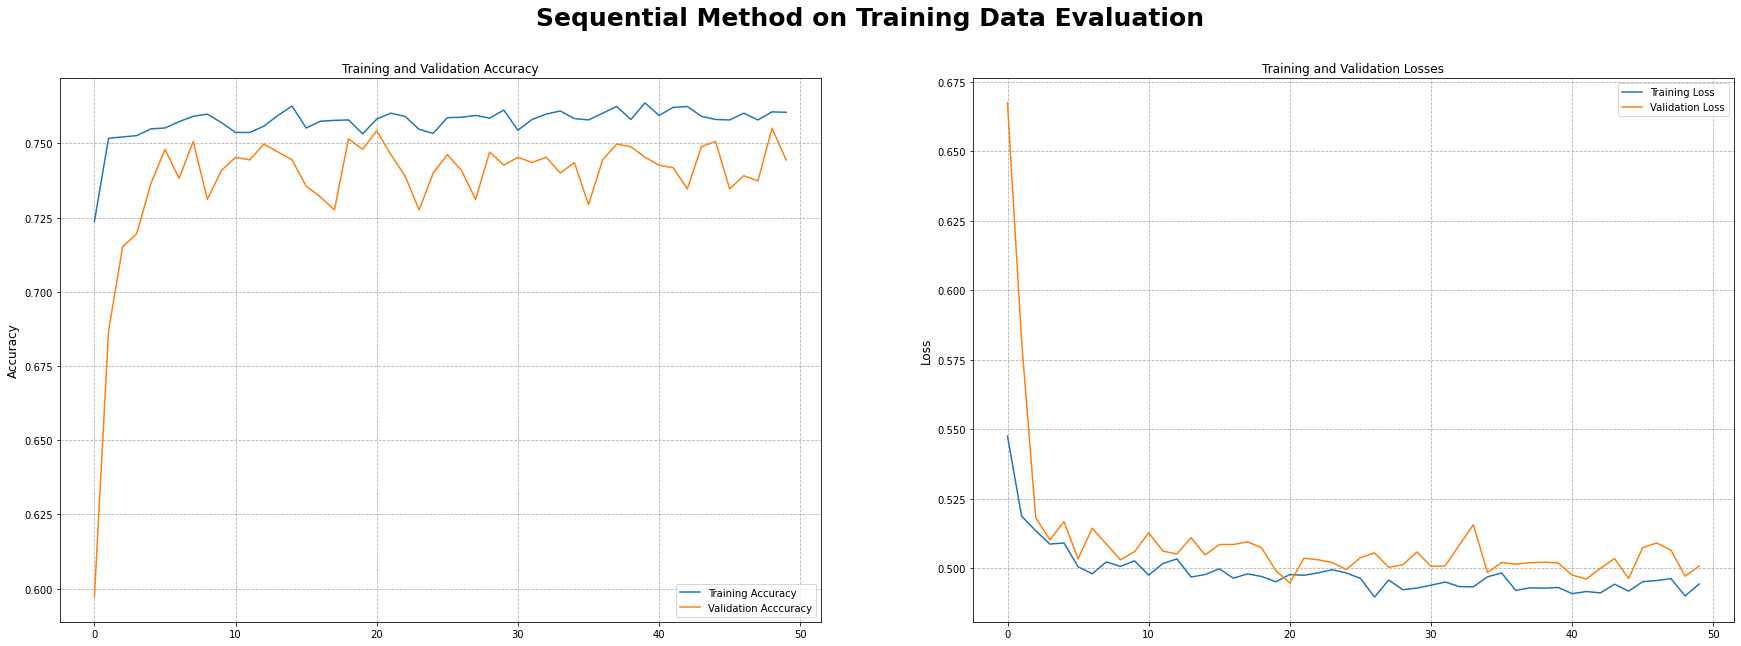

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seq.history['accuracy'],label="Training Accuracy")
plt.plot(history_seq.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq.history['loss'], label="Training Loss")
plt.plot(history_seq.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Setelah dilakukan training, dapat dilihat bahwa antara Training dan Validation cukup Overfit dan model ini juga dapat dikategorikan model yang memiliki Exploding Gradient meskipun sudah ditambahkan batch normalization, Maka dari itu akan dicoba melakukan Improvement terhadap model tersebut

#### Model Improvement

In [ ]:
# Sequential Model Architecture
model_seq_imp = tf.keras.models.Sequential()

# Input layer
model_seq_imp.add(tf.keras.layers.Dense(inp, activation='elu', kernel_initializer='GlorotNormal', kernel_regularizer='l2',input_shape=(inp,))) 
model_seq_imp.add(tf.keras.layers.BatchNormalization())
# model_seq_imp.add(tf.keras.layers.Dropout(rate=0.2))

# Hidden layer
model_seq_imp.add(tf.keras.layers.Dense(16, activation='elu'))
model_seq_imp.add(tf.keras.layers.BatchNormalization())

# Hidden layer
model_seq_imp.add(tf.keras.layers.Dense(16, activation='elu'))
model_seq_imp.add(tf.keras.layers.BatchNormalization())


# Output layer  
model_seq_imp.add(tf.keras.layers.Dense(out, activation='sigmoid'))

# Set the optimizer
opt = tf.keras.optimizers.Adamax(clipvalue = 0.5)

# Compiling the model
model_seq_imp.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])


Improvement Model dengan cara mengubah kernel_iniatializer menjadi 'GlorothUniform', Funcion Activation menjadi 'elu' dan mengganti Optimizer menjadi 'Adamax'. Selain itu juga dilakukan penambahan inisiasi kernel_regularizer 'l2' untuk mengurangi overfit dan penambahan clipping untuk mencegah terjadinya Exploding Gradient

In [ ]:
history_seq_imp=model_seq_imp.fit(train_dataset, validation_data=(val_dataset), batch_size = 64,epochs = 25)

Epoch 1/25
104/104 [==============================] - 2s 5ms/step - loss: 0.6732 - accuracy: 0.6869 - val_loss: 0.7298 - val_accuracy: 0.6016
Epoch 2/25
104/104 [==============================] - 0s 3ms/step - loss: 0.5979 - accuracy: 0.7406 - val_loss: 0.6110 - val_accuracy: 0.7028
Epoch 3/25
104/104 [==============================] - 0s 3ms/step - loss: 0.5941 - accuracy: 0.7407 - val_loss: 0.5688 - val_accuracy: 0.7453
Epoch 4/25
104/104 [==============================] - 0s 3ms/step - loss: 0.5809 - accuracy: 0.7484 - val_loss: 0.5487 - val_accuracy: 0.7498
Epoch 5/25
104/104 [==============================] - 0s 3ms/step - loss: 0.5750 - accuracy: 0.7477 - val_loss: 0.5383 - val_accuracy: 0.7569
Epoch 6/25
104/104 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.7457 - val_loss: 0.5312 - val_accuracy: 0.7587
Epoch 7/25
104/104 [==============================] - 0s 3ms/step - loss: 0.5648 - accuracy: 0.7505 - val_loss: 0.5244 - val_accuracy: 0.7551
Epoch 

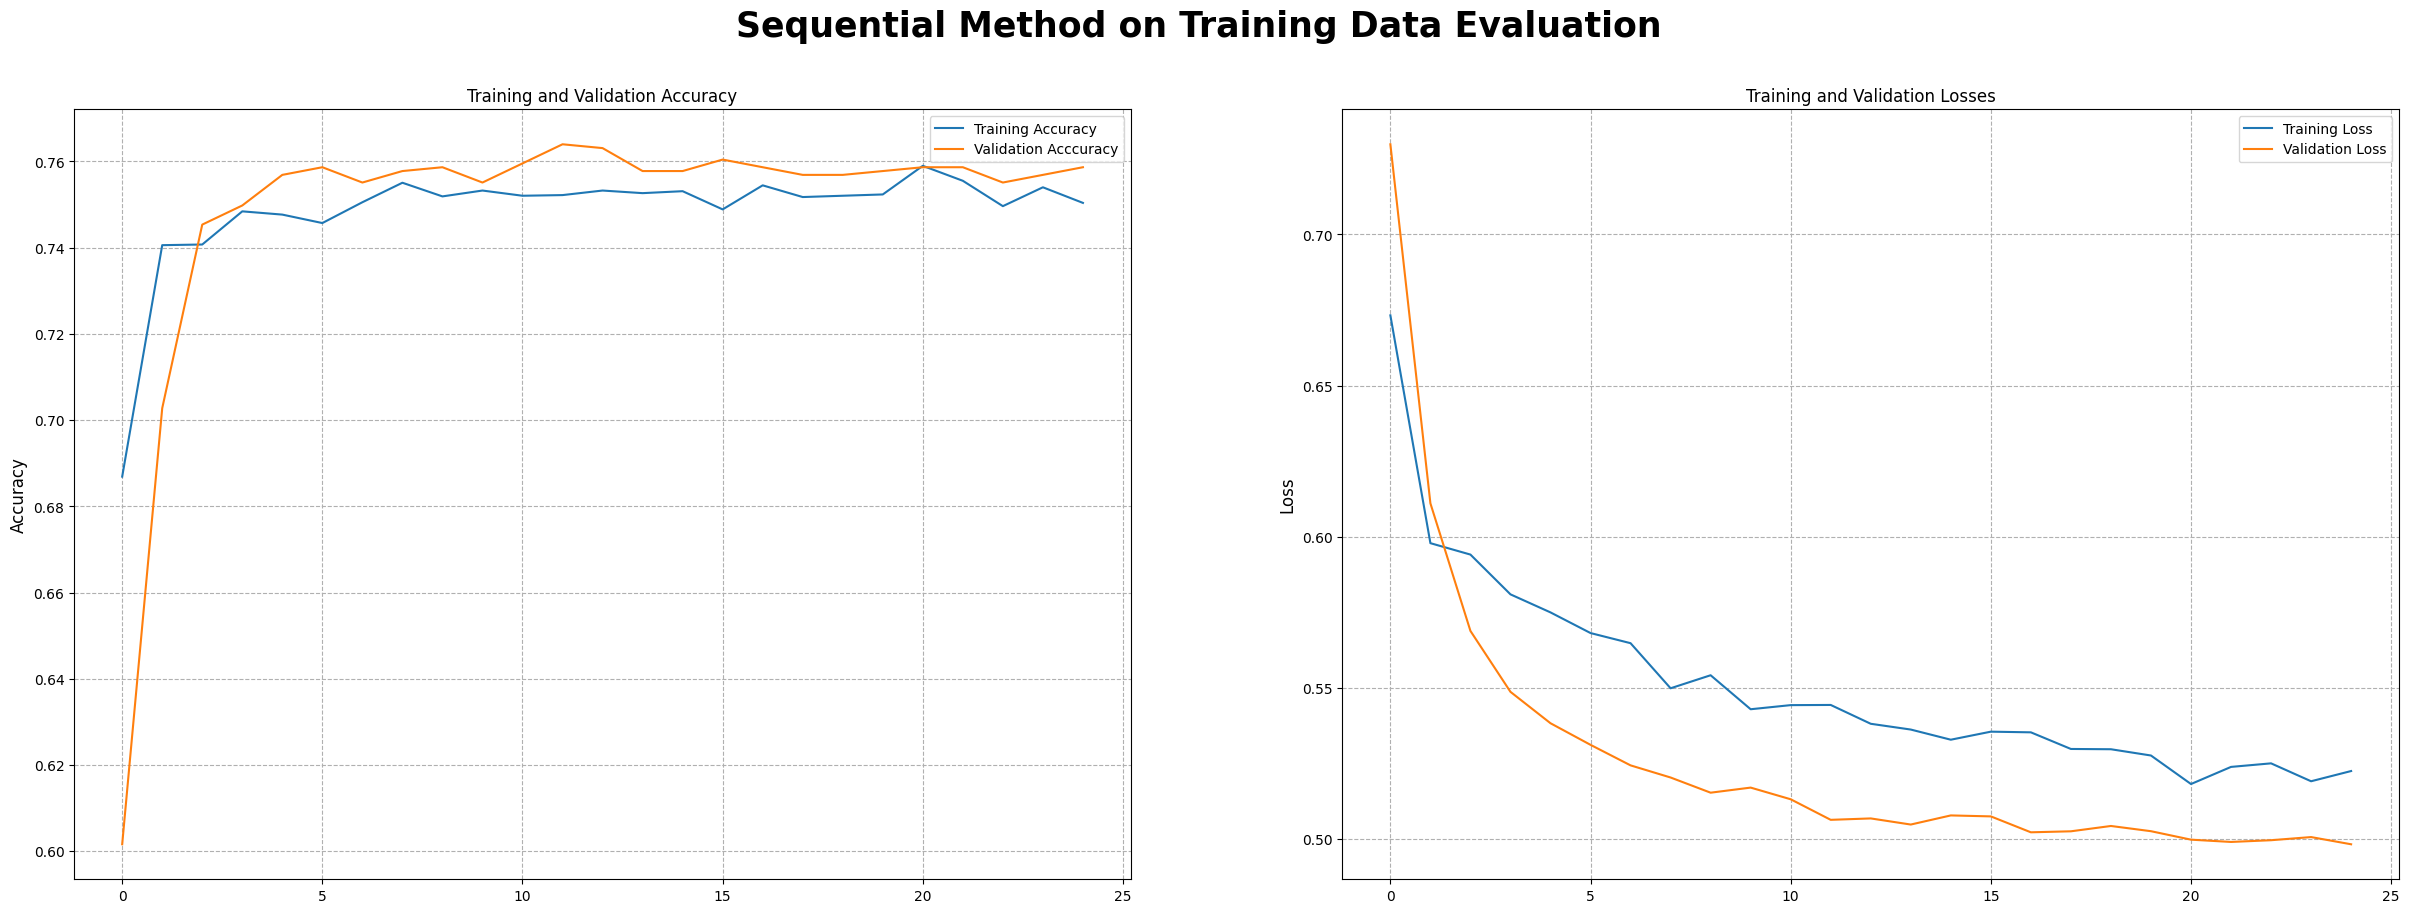

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential Method on Training Data Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seq_imp.history['accuracy'],label="Training Accuracy")
plt.plot(history_seq_imp.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq_imp.history['loss'], label="Training Loss")
plt.plot(history_seq_imp.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

Setelah dilakukan Improvement, dapat dilihat dari grafik bahwa model telah berhasil mengurangi overfitting karena selisih antara Train dan Validation semakin mengecil. Selain itu grafik juga menjadi lebih baik karena Exploding Gradient juga berkurang.

### Functional

#### Model Definition

Membuat Arstiekur Model ANN Functional

In [ ]:
# Setting the neuron
n_neuronFunc = (22, 10)
n_feature = X_resampled.shape[1]

# Input layer
data_in = Input(shape=(n_feature, )) # INPUT LAYER
hidden_n = data_in

# Hidden layer
for n in n_neuronFunc: # HIDDEN LAYER
    hidden_n = Dense(n, activation='relu')(hidden_n)
data_out = Dense(1, activation='sigmoid')(hidden_n) 

# Output layer
model_func = Model(inputs=data_in, outputs=data_out)

# Compile Model_Functional
model_func.compile(
    loss='binary_crossentropy',
    optimizer=opt, 
    metrics=['accuracy']
)

In [ ]:
# Model summary
model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_7 (Dense)             (None, 22)                220       
                                                                 
 dense_8 (Dense)             (None, 10)                230       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


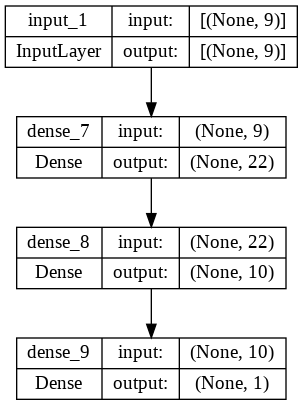

In [ ]:
# Model plotting
tf.keras.utils.plot_model(model_func, show_shapes = True)

#### Model Training

In [ ]:
# Training the model
history_func = model_func.fit(train_dataset, validation_data = (val_dataset), epochs = 25)

Epoch 1/25
104/104 [==============================] - 1s 4ms/step - loss: 0.6536 - accuracy: 0.6452 - val_loss: 0.5778 - val_accuracy: 0.7595
Epoch 2/25
104/104 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7490 - val_loss: 0.5344 - val_accuracy: 0.7391
Epoch 3/25
104/104 [==============================] - 0s 2ms/step - loss: 0.5286 - accuracy: 0.7567 - val_loss: 0.5221 - val_accuracy: 0.7294
Epoch 4/25
104/104 [==============================] - 0s 2ms/step - loss: 0.5070 - accuracy: 0.7555 - val_loss: 0.5256 - val_accuracy: 0.7258
Epoch 5/25
104/104 [==============================] - 0s 2ms/step - loss: 0.5010 - accuracy: 0.7599 - val_loss: 0.5197 - val_accuracy: 0.7356
Epoch 6/25
104/104 [==============================] - 0s 3ms/step - loss: 0.4969 - accuracy: 0.7612 - val_loss: 0.5197 - val_accuracy: 0.7338
Epoch 7/25
104/104 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7627 - val_loss: 0.5255 - val_accuracy: 0.7311
Epoch 

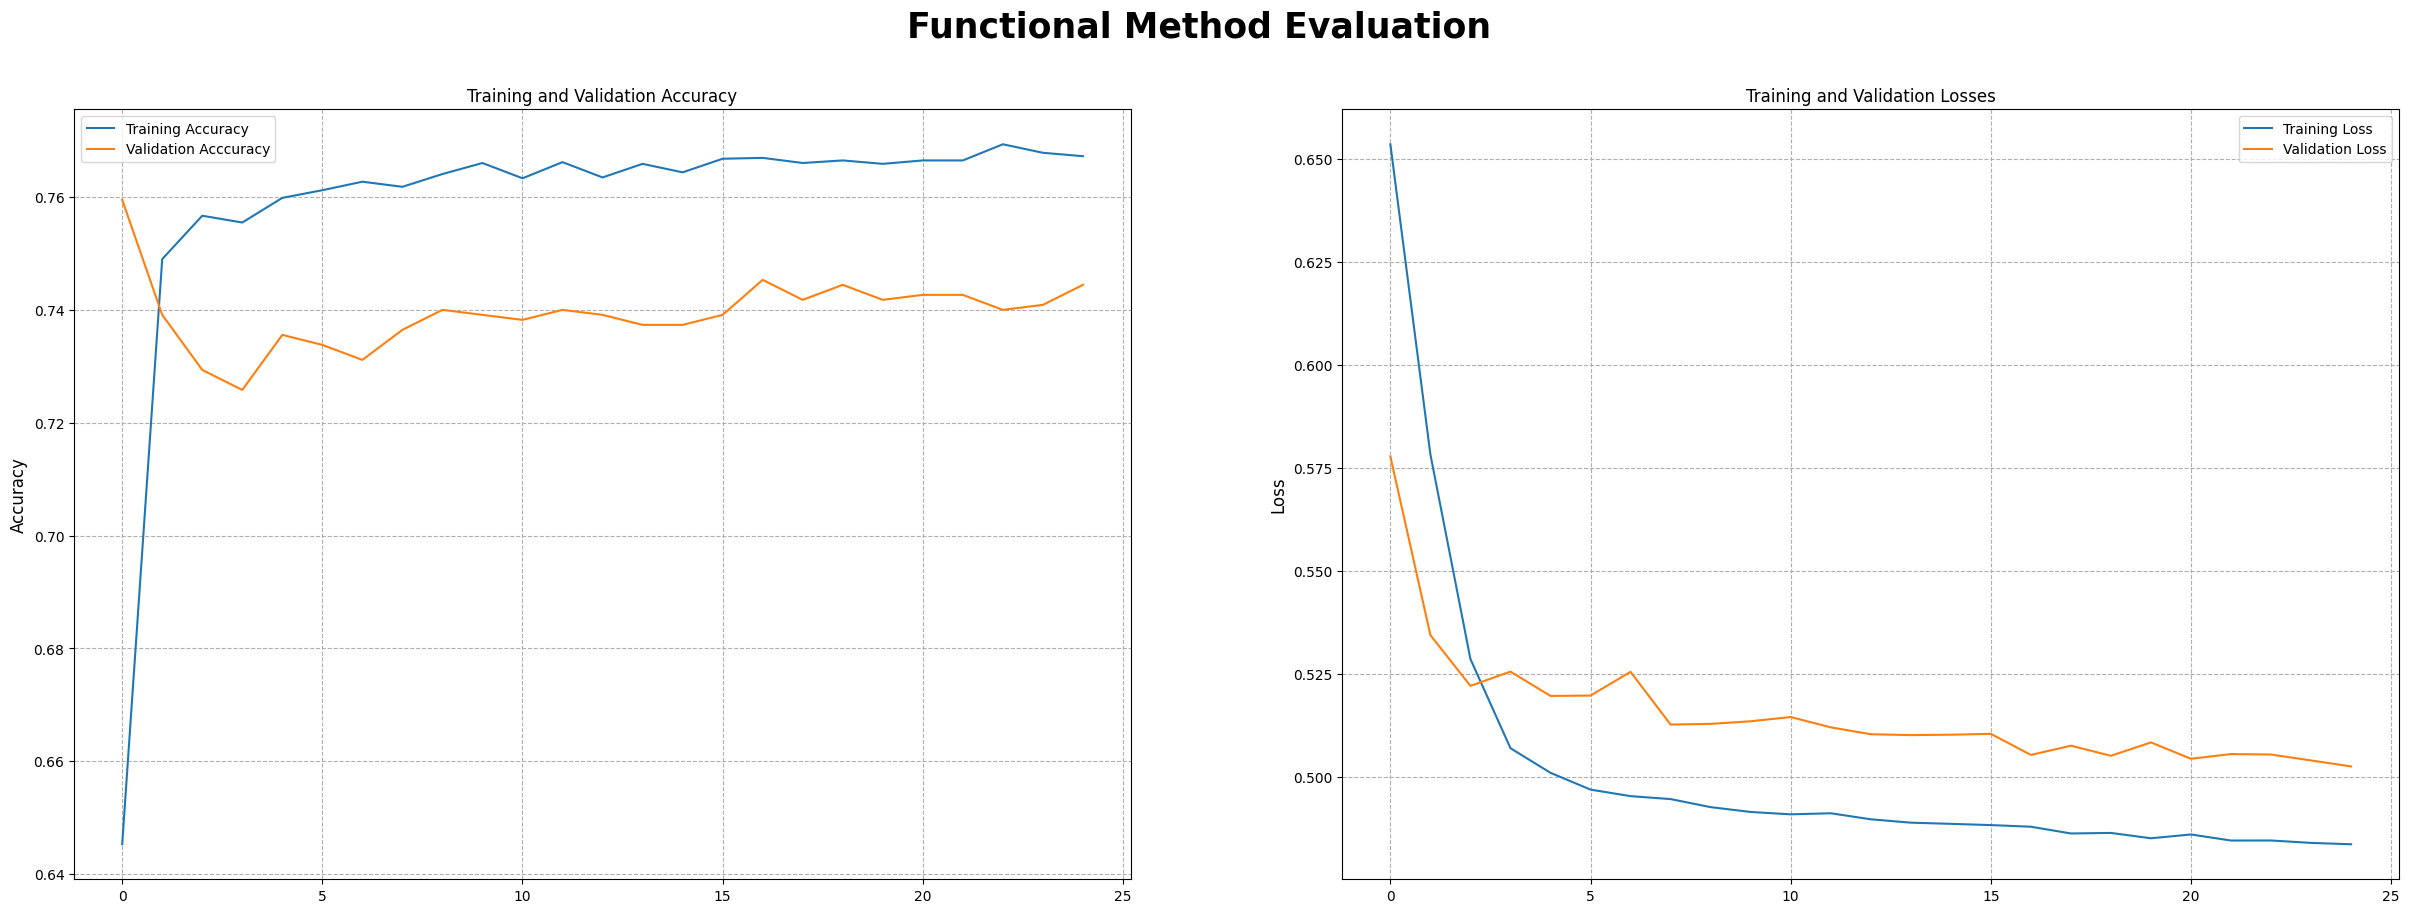

In [ ]:
# Loss and accuracy model plotting
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
fig.suptitle('Functional Method Evaluation', fontsize = 25, weight = 'bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize = 12)
plt.plot(history_func.history['accuracy'], label = "Training Accuracy")
plt.plot(history_func.history['val_accuracy'], label = "Validation Acccuracy")
plt.ylabel("Accuracy", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize = 12)
plt.plot(history_func.history['loss'], label = "Training Loss")
plt.plot(history_func.history['val_loss'], label = "Validation Loss")
plt.ylabel("Loss", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.style.use('default')
plt.show()

Setelah dilihat, model tidak terlalu Exploding Gradient, namun lumayan overfit, maka dari itu akan dicoba melakukan Improvement.

#### Model Improvement

In [ ]:
n_neuronfunc = (24, 12)   

# Arsitektur Model_Functional
data_in = Input(shape=(n_feature, ))                # Input Layer

hidden_n = data_in
for n in n_neuronfunc:                              # Hidden Layer
    hidden_n = Dense(n, activation='elu')(hidden_n)

data_out = Dense(1, activation='sigmoid')(hidden_n) # Output Layer

imp_model_func = Model(inputs=data_in, outputs=data_out)

Improvement dilakukan dengan cara mengubah Function Activation menjadi 'elu', Optimizer menjadi 'Adamax', menambahkan learning rate, dan batch size

In [ ]:
imp_model_func.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adamax(learning_rate=0.0001), metrics='accuracy')
imp_history_func = imp_model_func.fit(train_dataset, epochs=25, batch_size=64,validation_data=(val_dataset))

Epoch 1/25
104/104 [==============================] - 1s 4ms/step - loss: 0.6878 - accuracy: 0.6087 - val_loss: 0.7086 - val_accuracy: 0.5759
Epoch 2/25
104/104 [==============================] - 0s 2ms/step - loss: 0.6586 - accuracy: 0.6368 - val_loss: 0.6870 - val_accuracy: 0.5998
Epoch 3/25
104/104 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.6567 - val_loss: 0.6690 - val_accuracy: 0.6176
Epoch 4/25
104/104 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.6736 - val_loss: 0.6533 - val_accuracy: 0.6335
Epoch 5/25
104/104 [==============================] - 0s 2ms/step - loss: 0.6025 - accuracy: 0.6860 - val_loss: 0.6389 - val_accuracy: 0.6442
Epoch 6/25
104/104 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.6955 - val_loss: 0.6267 - val_accuracy: 0.6557
Epoch 7/25
104/104 [==============================] - 0s 2ms/step - loss: 0.5790 - accuracy: 0.7063 - val_loss: 0.6155 - val_accuracy: 0.6681
Epoch 

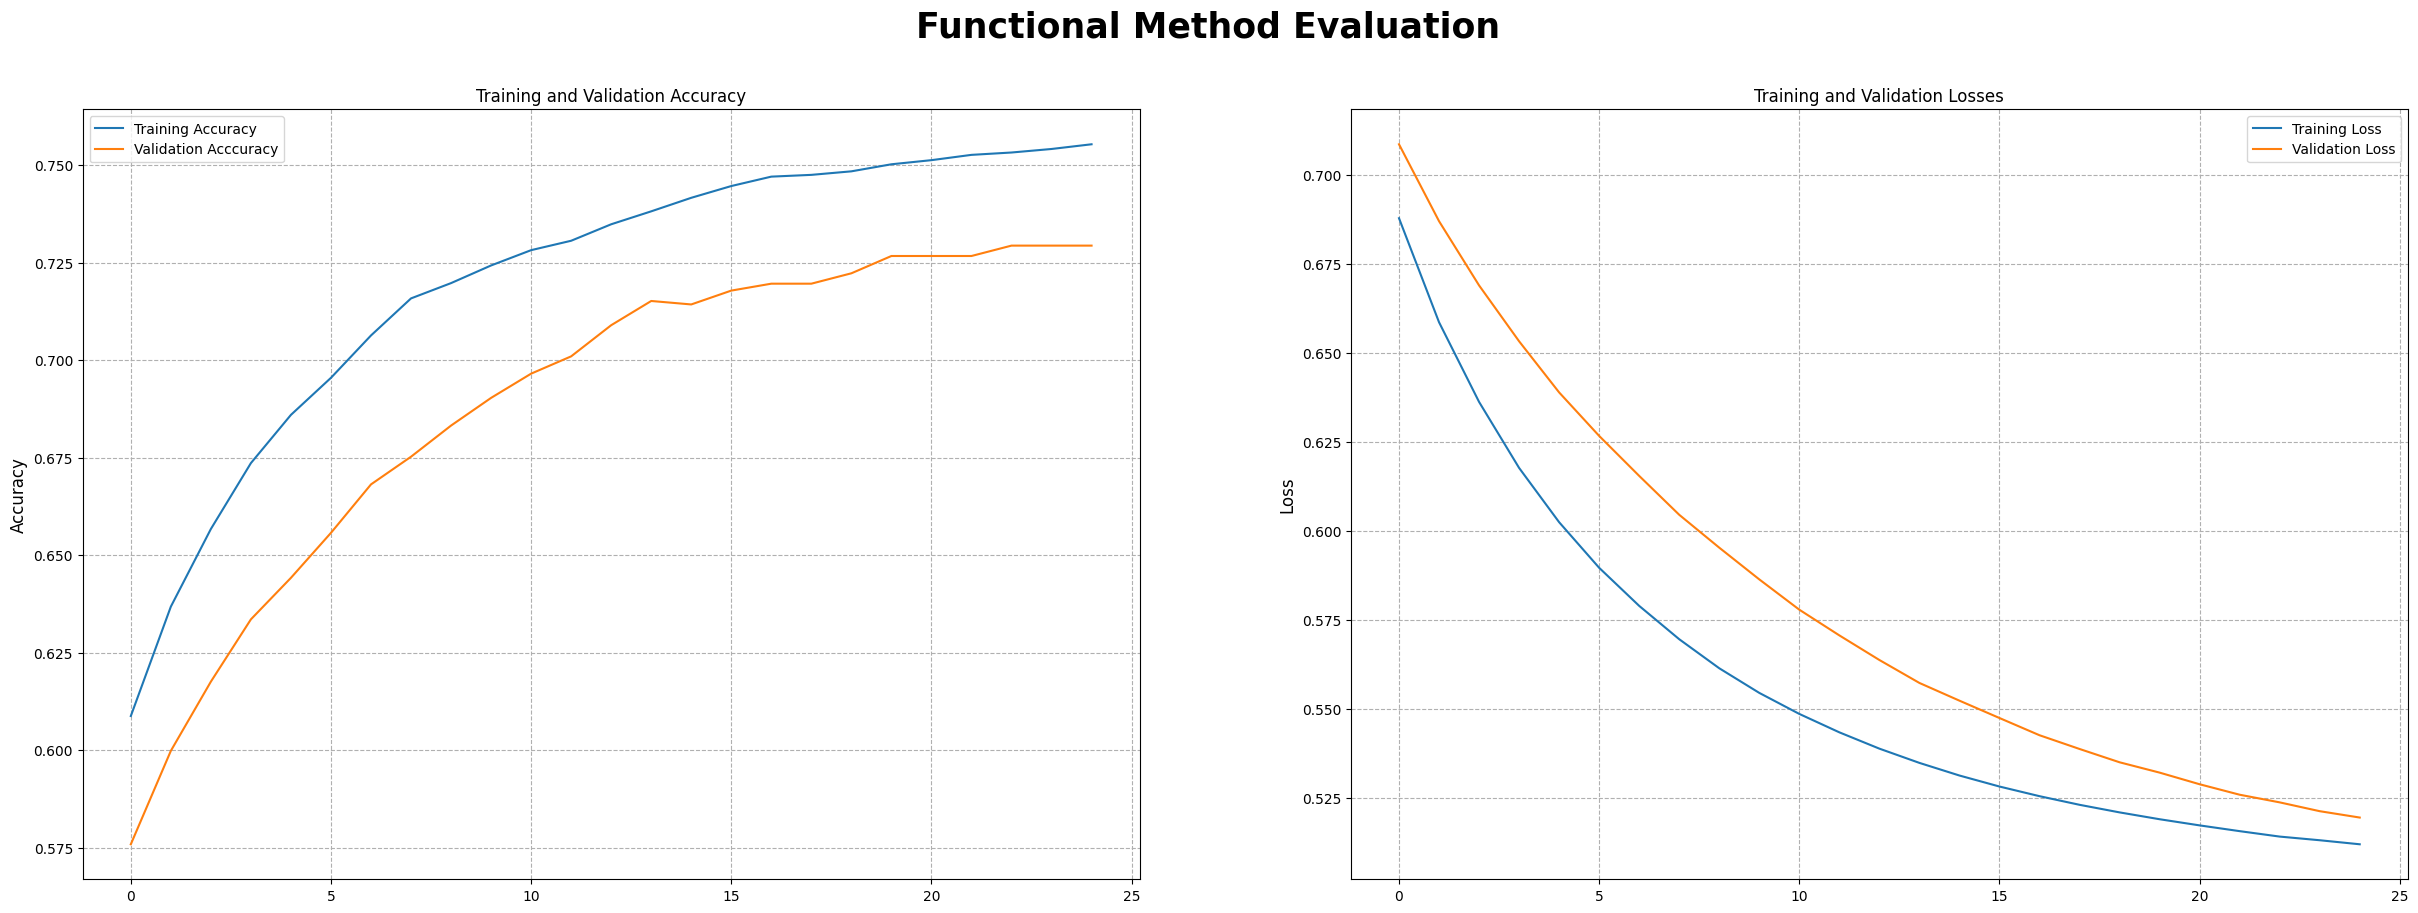

In [ ]:
# Loss and accuracy model plotting
fig, ax = plt.subplots(1, 2, figsize = (30, 10))
fig.suptitle('Functional Method Evaluation', fontsize = 25, weight = 'bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize = 12)
plt.plot(imp_history_func.history['accuracy'], label = "Training Accuracy")
plt.plot(imp_history_func.history['val_accuracy'], label = "Validation Acccuracy")
plt.ylabel("Accuracy", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize = 12)
plt.plot(imp_history_func.history['loss'], label = "Training Loss")
plt.plot(imp_history_func.history['val_loss'], label = "Validation Loss")
plt.ylabel("Loss", fontsize = 12)
plt.legend()
plt.grid(linestyle = '--')

plt.style.use('default')
plt.show()

Setelah dilakukan Improvement, dapat dilihat bahwa Exploding Gradient telah hilang, Namun data mengalami penururan pada nilai accuracy dan juga lebih overfit daripada Base Model Functional

## Model Evaluation

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay


### Sequential

23/23 [==============================] - 0s 2ms/step


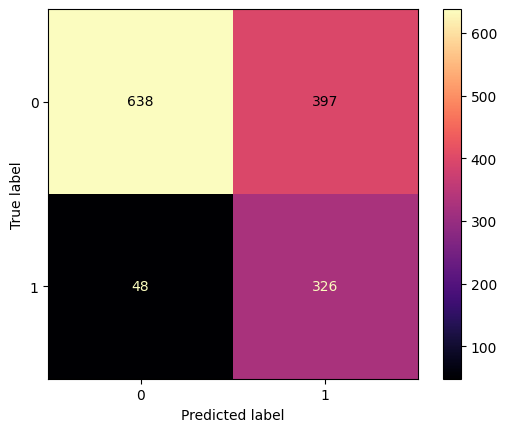

In [ ]:
# predict probabilities
y_pred_seq = model_seq_imp.predict(test_dataset)
y_pred_seq = (y_pred_seq > 0.4)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_seq)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

Berdasarkan hasil Evaluasi, jika dilihat dari Confusion Matrix, Model lebih baik dalam membaca kelas 1 yaitu Customer yang churn atau tidak lagi menjadi Customer Telco, karena model hanya salah membaca customer yang harusnya churn menjadi tidak churn sebanyak 49 orang. Namun model masih banyaki salah membaca Customer yang harusnya tidak churn menjadi customer churn

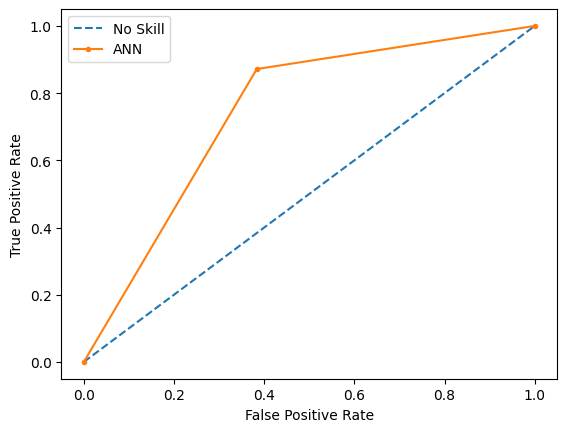

AUC score: 0.744041437391821


In [ ]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_seq)
auc = roc_auc_score(y_test, y_pred_seq)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

Model yang nilai AUC nya semakin mendekati 1, maka model itu semakin baik untuk membaca kedua kelas targetnya. pada kasus kali ini, model ANN functional memiliki nilai 0.74 dimana artinya model dapat dengan cukup baik membaca dan memisahkan kedua kelas target yang ada pada kasus kali ini

### Functional

23/23 [==============================] - 0s 4ms/step


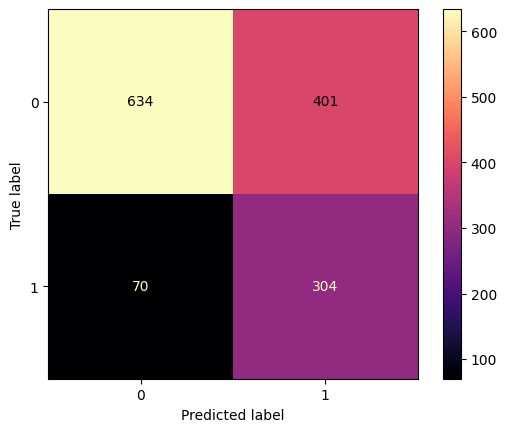

In [ ]:
# predict probabilities
y_pred_func = imp_model_func.predict(test_dataset)
y_pred_func = (y_pred_func > 0.4)

# confusion matrix
cm = confusion_matrix(y_test, y_pred_func)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='magma')
plt.show()

Berdasarkan hasil Evaluasi, jika dilihat dari Confusion Matrix, Model Functional kurang lebih sama dengan Model Sequential, Dimana Model Functional lebih baik dalam membaca kelas 1 yaitu Customer yang churn atau tidak lagi menjadi Customer Telco. Namun secara jumlah benar prediksi, Model Sequential memiliki performa yang lebih baik daripada Model Functional

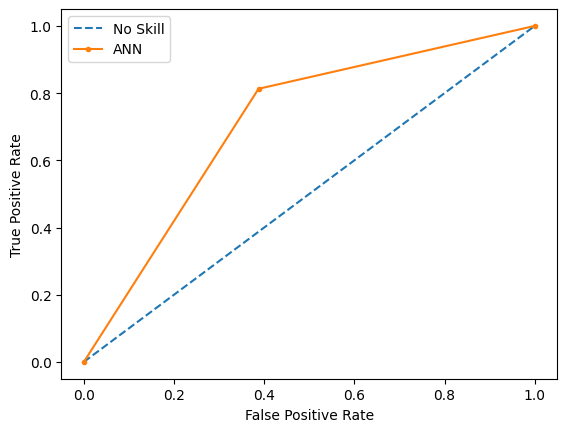

AUC score: 0.7126973055361803


In [ ]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_func)
auc = roc_auc_score(y_test, y_pred_func)

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
print(f'AUC score: {auc}')

Model yang nilai AUC nya semakin mendekati 1, maka model itu semakin baik untuk membaca kedua kelas targetnya. pada kasus kali ini, model ANN functional memiliki nilai 0.71 dimana artinya model dapat dengan cukup baik membaca dan memisahkan kedua kelas target yang ada pada kasus kali ini.

Namun jika dibandingkan antara Sequential dan Functional, maka Model ANN Sequential lebih baik daripada Functional dari segi nilai AUC dan Confusion Matrix nya.


## Model Saving

Menyimpan Model untuk Deployment nantinya

In [ ]:
pickle.dump(full_pipeline, open('M1P2_pred.pkl','wb'))

model_seq_imp.save('telco_churn_model_sequential.h5')

In [ ]:
import sklearn
print(tf.__version__)
print(sklearn.__version__)
print(np.__version__)

2.9.2
1.0.2
1.21.6


## Model Inference

Mengetes Model diluar data Train,Validation dan Test set

In [ ]:
df_inf =pd.DataFrame ({
 'tenure': [32,43,53],
 'MonthlyCharges': [24.7,26.0,40.5],
 'TotalCharges': [1780.0,800.0,4200.0],
 'Contract': ['Month-to-month' ,'One year' ,'Two year'] ,
 'InternetService': ['DSL', 'Fiber optic','No']})


In [ ]:
df_inf_final = full_pipeline.transform(df_inf)

In [ ]:
Category = np.round(model_seq_imp.predict(df_inf_final))
Category

1/1 [==============================] - 0s 118ms/step


array([[1.],
       [0.],
       [0.]], dtype=float32)

## Conclusion

- Pada pembuatan Model kali ini, dilakukan pembuatan Model ANN dengan Sequential dan Functional. 

- Model Functional dan Sequential dapat memprediksi Churn dengan cukup baik pada analisis ini.

- Dilihat dari Confusion dan AUC score, nilai dari model Sequential lebih baik performanya dibanding dengan Functional

- Kekurangan dari model ini adalah belum maksimal dalam melakukan hyperparamater sehingga nilai nya masih belum sempurna. Model sebenarnya sudah cukup baik dalam memprediksi, hal ini mungkin juga disebabkan oleh dilakukannya handling data imbalance.

- diharapkan nantinya akan dicoba parameter dan optimizer yang lain,juga pemilihan feature selection dengan lebih baik menggunakan cara cara lain.